### linkフラグパターン


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.display import display
from collections import Counter
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("/Users/daichisato/Downloads/node_new.csv")
df=df.fillna(0)

In [3]:
df.columns

Index(['objectid', 'signal_f', 'name_kanji', 'name_yomi', 'density_5000m',
       'density_500m', 'xing_count', 'len1', 'len2', 'len3', 'len4', 'len5',
       'len6', 'len7', 'len8', 'linecnt1', 'linecnt2', 'linecnt3', 'linecnt4',
       'linecnt5', 'linecnt6', 'linecnt7', 'linecnt8', 'angle1', 'angle2',
       'angle3', 'angle4', 'angle5', 'angle6', 'angle7', 'angle8',
       'roadwidth1', 'roadwidth2', 'roadwidth3', 'roadwidth4', 'roadwidth5',
       'roadwidth6', 'roadwidth7', 'roadwidth8', 'lane_count1', 'lane_count2',
       'lane_count3', 'lane_count4', 'lane_count5', 'lane_count6',
       'lane_count7', 'lane_count8', 'roadclass1', 'roadclass2', 'roadclass3',
       'roadclass4', 'roadclass5', 'roadclass6', 'roadclass7', 'roadclass8',
       'double_line_4way', 'length_station', 'acc_angle_station',
       'angle_per_length_station', 'length_school', 'acc_angle_school',
       'angle_per_length_school', 'closeness_5000', 'closeness_500',
       'betweenness_5000', 'betweenness_5

In [13]:
df["車両相互フラグ"]=df.車両相互.map(lambda x: 0 if x==0 else 1 if  x<=4 else 2)

In [14]:
df["車両相互フラグ"].value_counts()

1    2604
0    1224
2     652
Name: 車両相互フラグ, dtype: int64

In [97]:
df

,objectid,signal_f,name_kanji,name_yomi,density_5000m,density_500m,xing_count,len1,len2,len3,...,node_objectid,traffic_volume_24h,その他,車両相互,車両単独,人対車両,車両相互率,車両単独率,人対車両率,車両相互フラグ
0,815324,0,0,0,6722,105,4,66.594779,24.563577,26.633124,...,815324.0,21946.0,0.0,5.0,0.0,0.0,0.000228,0.000000,0.000000,2
1,815330,1,新神戸,シンカンベ,6722,76,4,33.067249,170.842649,51.023165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0
2,815332,0,0,0,6722,76,3,54.751315,52.750016,111.660639,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0
3,815347,1,中島通３丁目,ナカシマドオリサンチョウメ,6722,76,4,10.869988,31.908343,18.673762,...,815347.0,54336.0,0.0,2.0,0.0,0.0,0.000037,0.000000,0.000000,1
4,815402,1,0,0,6722,73,4,42.624033,111.432039,142.717375,...,815402.0,9442.0,0.0,5.0,0.0,0.0,0.000530,0.000000,0.000000,2
5,815403,1,西島三丁目,ニシジマサンチョウメ,6722,72,4,108.588929,86.086271,66.728880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0
6,815440,1,馬寄,ウマヨセ,6722,88,4,38.442747,86.899238,82.124352,...,815440.0,20445.0,0.0,4.0,0.0,0.0,0.000196,0.000000,0.000000,2
7,815453,0,0,0,6722,73,4,26.097040,188.994533,40.780564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0
8,815659,0,0,0,6722,36,4,100.178156,92.834717,114.757409,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0
9,818160,0,0,0,6722,86,4,25.395209,111.660639,53.738106,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0


In [16]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=1224)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=1224)
#len_0=df[df["len_count"]==0].sample(n=309)
#len_3=df[df["len_count"]==3].sample(n=609)
#len_4=df[df["len_count"]==4].sample(n=1806)
#len_5=df[df["len_count"]==5].sample(n=352)
#len_6=df[df["len_count"]==6].sample(n=20)
#df_no_accidents_sample=pd.concat([len_0, len_3, len_4, len_5, len_6], ignore_index=True)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f", "density_5000m",
       "density_500m", "xing_count", 
       "double_line_4way", "length_station", "acc_angle_station",
       "angle_per_length_station", "length_school", "acc_angle_school",
       "angle_per_length_school", "closeness_5000", "closeness_500",
       "betweenness_5000", "betweenness_500", "diff_lane", "width", "width_sum", "angle_min", "traffic_volume_24h"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [117]:
df_accidents_sample["len_count"].value_counts()

,signal_f,density_5000m,density_500m,xing_count,len1,len2,len3,len4,len5,len6,...,angle_per_length_station,length_school,acc_angle_school,angle_per_length_school,closeness_5000,closeness_500,betweenness_5000,betweenness_500,node_objectid,traffic_volume_24h
3915,0,5927,95,3,61.520624,122.155324,40.050983,0.000000,0.000000,0.00000,...,0.000000e+00,293.106525,1.092234,3.726405e-03,0.000065,0.000177,1.0,1.0,0.0,0.0
2014,0,5572,82,3,96.185695,148.782765,117.604209,0.000000,0.000000,0.00000,...,3.667891e-03,652.927689,2.468372,3.780468e-03,0.000073,0.000028,1.0,1.0,0.0,0.0
1459,0,2236,78,4,63.572123,88.815663,61.604540,12.484547,0.000000,0.00000,...,8.659910e-03,292.299183,1.236025,4.228629e-03,0.000105,0.000048,3.0,3.0,0.0,0.0
546,0,4894,21,4,161.832038,62.400527,97.055477,142.762584,0.000000,0.00000,...,8.982118e-03,809.619985,5.297943,6.543740e-03,0.000084,0.000013,1.0,1.0,0.0,0.0
2254,1,6274,93,4,22.452767,56.135729,164.148527,14.281896,0.000000,0.00000,...,7.838972e-05,503.166089,0.577403,1.147539e-03,0.000061,0.000167,1.0,1.0,795124.0,44089.0
3090,1,6588,35,4,9.779339,127.234427,76.897117,44.937891,0.000000,0.00000,...,3.224149e-03,989.655660,1.218778,1.231517e-03,0.000057,0.000109,3.0,3.0,744309.0,26265.0
10,1,6722,105,4,77.985298,36.053795,69.506339,52.622614,0.000000,0.00000,...,7.892016e-03,129.804125,0.000000,0.000000e+00,0.000060,0.000025,3.0,3.0,0.0,0.0
551,0,3407,55,3,260.461395,146.424280,37.149173,0.000000,0.000000,0.00000,...,3.452574e-03,966.369454,8.910099,9.220179e-03,0.000114,0.000018,1.0,1.0,0.0,0.0
2904,1,6588,69,4,11.522784,61.416145,52.449720,39.428772,0.000000,0.00000,...,4.869054e-03,476.586958,0.062233,1.305801e-04,0.000057,0.000091,3.0,3.0,743079.0,27327.0
3977,1,6424,75,5,108.134745,85.109069,10.914901,17.460360,11.453107,0.00000,...,3.460284e-03,655.244949,1.579135,2.409991e-03,0.000061,0.000103,3.0,3.0,745382.0,27694.0


In [57]:
df_no_accidents_sample["len_count"].value_counts()

4    1806
3     609
5     352
0     309
6      20
Name: len_count, dtype: int64

In [17]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [5000],
    'random_state' : [0],
    'max_depth': [10],
    #'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5000], 'random_state': [0], 'max_depth': [10], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [18]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [19]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.88979591836734695

0.81640625

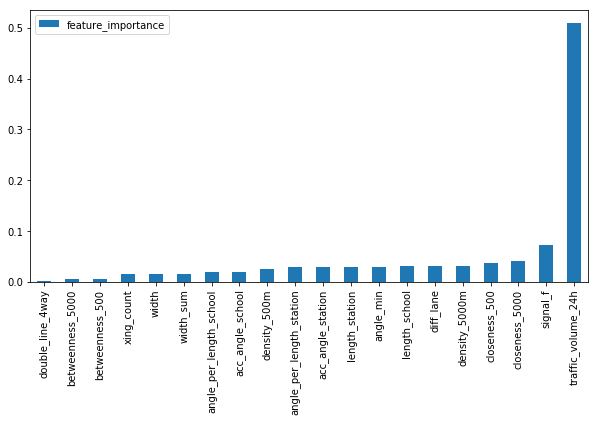

In [20]:


### lenなども含めた場合

In [54]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=20, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [55]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.82001614205004036

0.77586206896551724

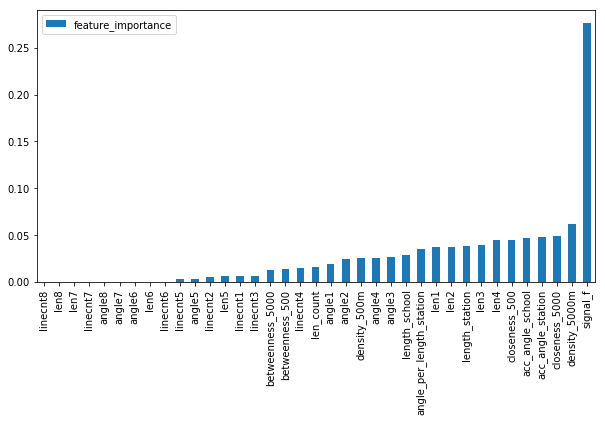

In [56]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m","len1", "len2", "len3", "len4", "len5", "len6", "len7", "len8",
            "linecnt1", "linecnt2", "linecnt3", "linecnt4", "linecnt5", "linecnt6", "linecnt7", "linecnt8",
            "angle1", "angle2", "angle3", "angle4", "angle5", "angle6", "angle7" , "angle8", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500", "len_count"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()




 ### signal_f抜き

In [61]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [62]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.72154963680387407

0.67660910518053374

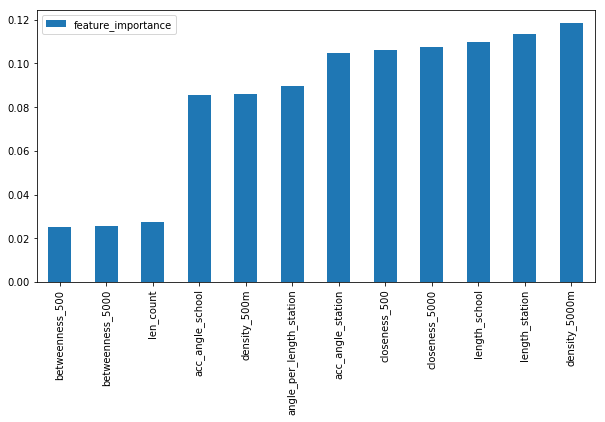

In [63]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500", "len_count"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()




### 木の数5000

In [71]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [72]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.71509281678773207

0.66874027993779162

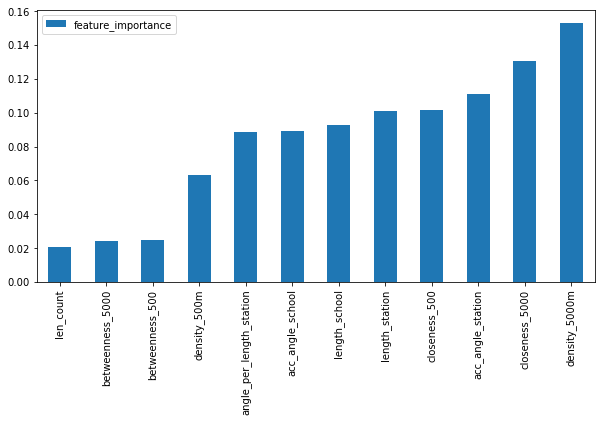

In [73]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500", "len_count"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()




### density_5000とcloseness_5000の２変数

In [76]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [77]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.69572235673930594

0.66312594840667682

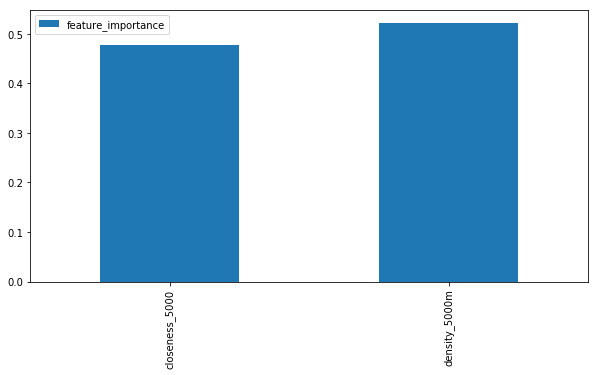

In [78]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "closeness_5000"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()

In [108]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [109]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.67958030669895075

0.64751552795031053

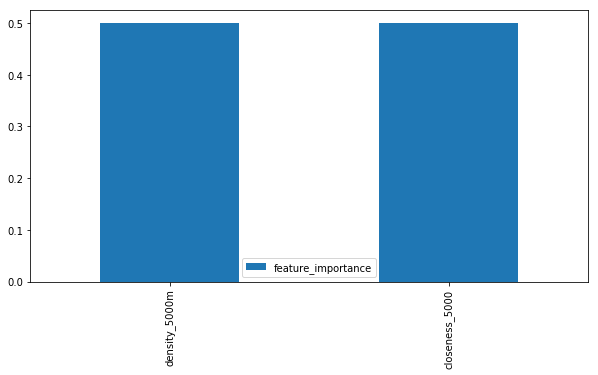

In [111]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "density_5000m", "closeness_5000"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()

### signal_f, density_5000, closeness_5000の３変数


In [81]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [82]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.7812752219531881

0.70947030497592301

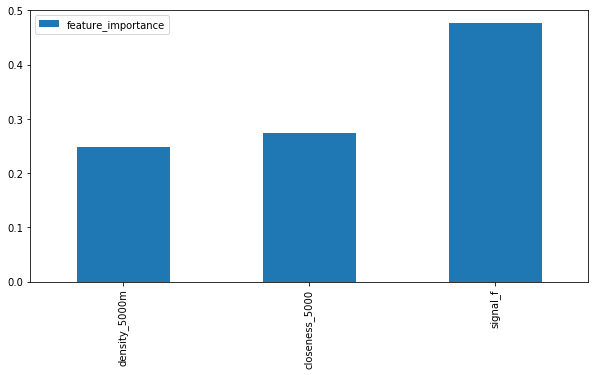

In [84]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "closeness_5000"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()


2回目

In [99]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [100]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.74576271186440679

0.66917293233082709

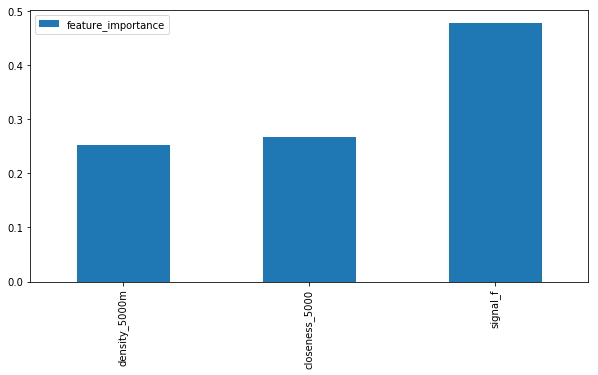

In [101]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "closeness_5000"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()

3回目


In [103]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [104]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.74576271186440679

0.66917293233082709

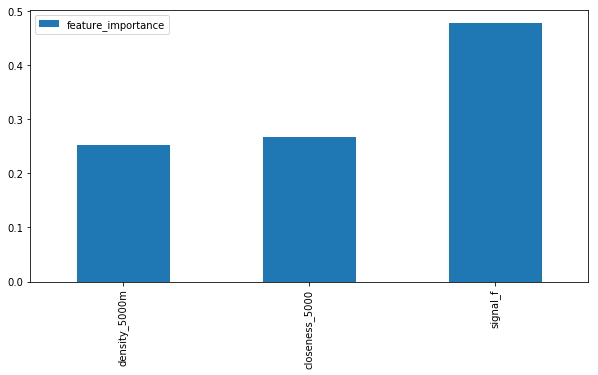

In [105]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "closeness_5000"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()

### signal_mod

In [91]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=5000, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [92]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.76755447941888622

0.67522658610271902

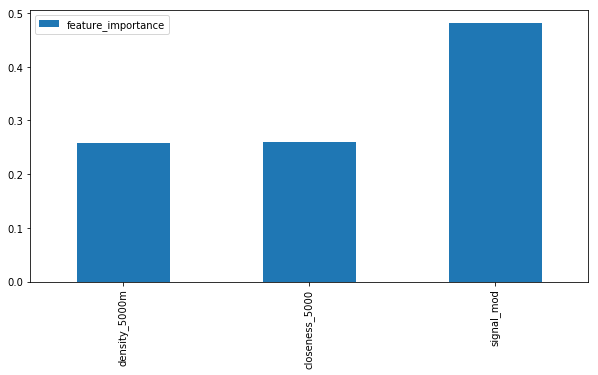

In [93]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_mod","density_5000m", "closeness_5000"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()







In [15]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=3000)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=3000)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500", "fl1", "fl2", "fl3", "fl4", "fl5", "fl6", "fl7", "fl8"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [17]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [18]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.83916666666666662

0.72805507745266784

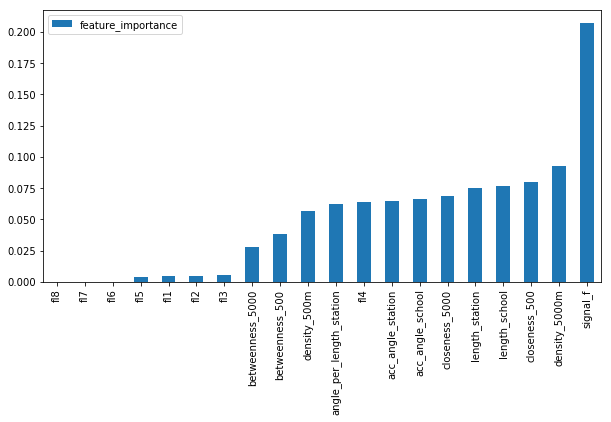

In [22]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500", "fl1", "fl2", "fl3", "fl4", "fl5", "fl6", "fl7", "fl8"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()




### 確率で重み付け

In [23]:
df

,meshid,objectid,signal_f,name_kanji,name_yomi,density_5000m,density_500m,len1,len2,len3,...,fl1,fl2,fl3,fl4,fl5,fl6,fl7,fl8,len_count,車両相互フラグ
0,1,3039662,0,0,0,1817,5,79.462619,103.554035,152.695646,...,1,1,1,0,0,0,0,0,3,0
1,1,3039758,0,0,0,1817,17,36.577383,377.828859,58.378316,...,1,1,1,0,0,0,0,0,3,0
2,1,4616575,0,0,0,1817,6,42.407432,53.423743,7.264506,...,1,1,1,0,0,0,0,0,3,0
3,1,3048457,0,0,0,1817,35,5.019972,104.641242,48.564055,...,1,1,1,0,0,0,0,0,3,0
4,1,3048458,0,0,0,1817,35,18.850006,59.219884,58.628580,...,1,1,1,0,0,0,0,0,3,0
5,1,3048459,0,0,0,1817,35,580.597893,45.769366,24.621877,...,1,1,1,0,0,0,0,0,3,0
6,1,3048460,0,0,0,1817,1,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
7,1,3048461,0,0,0,1817,1,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
8,1,3048462,0,0,0,1817,35,51.303188,1515.133680,5.019972,...,1,1,1,0,0,0,0,0,3,0
9,1,3048463,0,0,0,1817,35,23.710727,32.444397,66.775990,...,1,1,1,0,0,0,0,0,3,0


In [6]:
df=pd.read_csv("/Users/daichisato/Documents/node_re.csv")

In [7]:
a=df[["angle1", "angle2", "angle3","angle4", "angle5", "angle6","angle7", "angle8"]]
angle=np.cos(a.min(axis=1))
df["angle_min"]=angle
df=df.fillna(0)

In [8]:
df["車両相互フラグ"]=df.車両相互率.map(lambda x: 0 if x==0 else 1 if  x<0.00020 else 2)

In [11]:
#学習データ：テストデータ=1:1#
import random
make_accidents=df[df["車両相互フラグ"]!=0]
df_accidents_sample=make_accidents.sample(n=3000)

make_no_accidents=df[df["車両相互フラグ"]==0]
df_no_accidents_sample=make_no_accidents.sample(n=3000)

from sklearn.cross_validation import train_test_split
make_df=pd.concat([df_accidents_sample, df_no_accidents_sample])
make_df_Y=make_df["車両相互フラグ"]
make_df_X=make_df[[ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500", "len_count", "lensum_mod", "linecntsum_mod", "angle_min"]]
(X_train, X_test, y_train, y_test) = train_test_split(make_df_X, make_df_Y, test_size = 0.2)

In [12]:
from sklearn.model_selection import GridSearchCV
params = {
    'n_estimators'  : [10, 20, 50, 100, 200, 500],
    'random_state' : [0],
    'max_depth': [10, 20, 50, 100, 200, 500],
    'n_jobs': [-1]
         }
mod = RandomForestClassifier()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)



/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/daichisato/anaconda/lib/python3.6/site-packages/sklearn/metrics/scorer.py:90: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sam

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 50, 100, 200, 500], 'random_state': [0], 'max_depth': [10, 20, 50, 100, 200, 500], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='mean_squared_error', verbose=0)

In [47]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [48]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.82416666666666671

0.72096774193548385

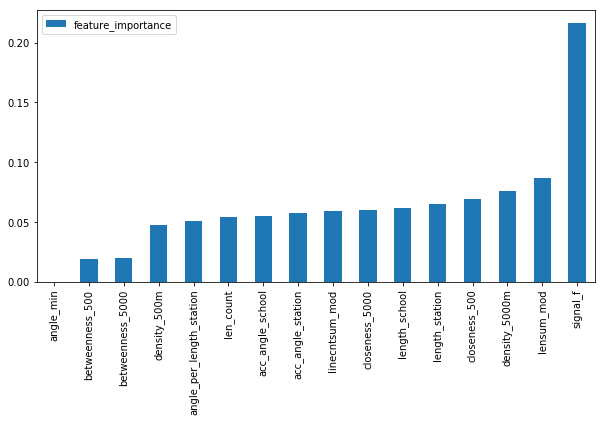

In [49]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500", "len_count", "lensum_mod", "linecntsum_mod", "angle_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()





In [13]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=-1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [14]:
display(cv.best_estimator_.score(X_test, y_test))
display(cv.best_estimator_.score(X_test[y_test>0], y_test[y_test>0]))

0.83083333333333331

0.72758620689655173

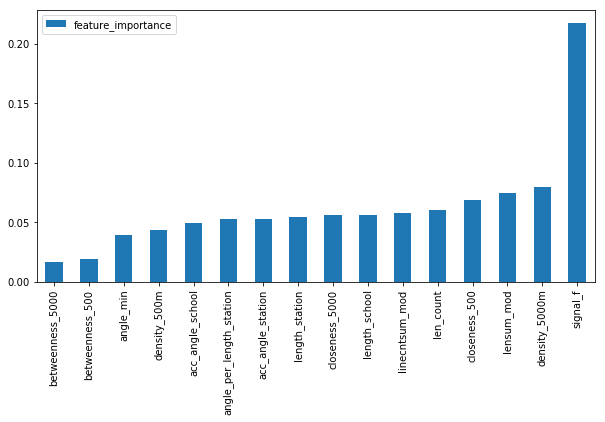

In [15]:
#np.arange(27)

importance=pd.DataFrame({ "feature_importance": cv.best_estimator_.feature_importances_}, index=[ "signal_f","density_5000m", "density_500m", "length_station",
            "acc_angle_station", "angle_per_length_station", "length_school", "acc_angle_school", 
            "closeness_500", "closeness_5000", "betweenness_5000", "betweenness_500", "len_count", "lensum_mod", "linecntsum_mod", "angle_min"])

importance.sort_values(ascending=True, by="feature_importance").plot(kind="bar", figsize=(10, 5))
plt.show()






In [20]:
df.to_csv('node_rf_mod.csv')